In [1]:
# Define activities: name, required resources, and time to finish
activities = [
    ("a", 2, 3),
    ("b", 3, 4),
    ("c", 4, 2),
    ("d", 4, 2),
    ("e", 3, 1),
    ("f", 2, 4),
]

# Define the total available resources
total_resources = 4

In [2]:
import random

def generate_random_schedule():
    # Shuffle the activities randomly to create a schedule
    schedule = random.sample(activities, len(activities))
    return schedule

In [3]:
def evaluate_schedule(schedule):
    total_time = 0
    current_resources = 0
    current_activities = []  # Activities running concurrently
    
    for activity, resources, time in schedule:
        # Check resource constraint
        if current_resources + resources <= total_resources:
            current_resources += resources
            current_activities.append((activity, time))
        else:
            # Find the maximum time among the activities that can run concurrently
            max_time = max(current_activities, key=lambda x: x[1])[1]
            total_time += max_time
            
            # Reset current resources and activities
            current_resources = resources
            current_activities = [(activity, time)]
    
    # Add the time for the last batch of activities
    total_time += max(current_activities, key=lambda x: x[1])[1]
    
    return total_time

In [4]:
def crossover(parent1, parent2):
    # Order-based crossover (OX)
    # Choose two random crossover points
    crossover_point1 = random.randint(0, len(parent1) - 1)
    crossover_point2 = random.randint(crossover_point1 + 1, len(parent1))

    # Create two empty offspring with the same length as the parents
    offspring1 = [None] * len(parent1)
    offspring2 = [None] * len(parent1)

    # Copy the genetic material between the crossover points from parent1 to offspring1 and from parent2 to offspring2
    offspring1[crossover_point1:crossover_point2] = parent1[crossover_point1:crossover_point2]
    offspring2[crossover_point1:crossover_point2] = parent2[crossover_point1:crossover_point2]

    # Fill in the remaining positions with genetic material from parent2 to offspring1 and from parent1 to offspring2
    idx2 = crossover_point2
    idx1 = crossover_point2
    while None in offspring1:
        gene2 = parent2[idx2 % len(parent2)]
        gene1 = parent1[idx1 % len(parent1)]
        if gene2 not in offspring1:
            offspring1[idx1 % len(parent1)] = gene2
        if gene1 not in offspring2:
            offspring2[idx2 % len(parent2)] = gene1
        idx1 += 1
        idx2 += 1

    return offspring1, offspring2

In [5]:
def genetic_algorithm(num_generations, pop_size):
    population = [generate_random_schedule() for _ in range(pop_size)]
    
    for generation in range(num_generations):
        # Evaluate fitness of the population
        fitness_scores = [evaluate_schedule(schedule) for schedule in population]
        
        # Create new generation through tournament selection, crossover, and mutation
        new_population = []
        while len(new_population) < pop_size:
            # Tournament selection (select two random schedules and pick the best)
            tournament_size = min(5, len(population))
            tournament = random.sample(list(enumerate(population)), tournament_size)
            tournament.sort(key=lambda x: fitness_scores[x[0]])
            parent1 = tournament[0][1]
            parent2 = tournament[1][1]
            
            offspring1, offspring2 = crossover(parent1, parent2)
            
            # Mutation
            if random.random() < 0.1:
                offspring1 = generate_random_schedule()
            if random.random() < 0.1:
                offspring2 = generate_random_schedule()
            
            # Add offspring to the new population
            new_population.extend([offspring1, offspring2])
        
        # Sort the population by fitness
        population_with_fitness = list(zip(population, fitness_scores))
        population_with_fitness.sort(key=lambda x: x[1])
        population = [schedule for schedule, _ in population_with_fitness[:pop_size]]
    
    # Select the best solution as the result
    best_schedule = min(population, key=evaluate_schedule)
    return best_schedule, evaluate_schedule(best_schedule)

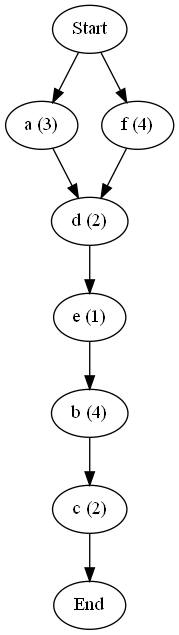

In [1]:
import graphviz
from IPython.display import Image

def visualize_parallel_schedule():
    dot = graphviz.Digraph(format='png', engine='dot')
    
    # Define the activities and their order
    activities = ['Start', 'a (3)', 'f (4)', 'd (2)', 'e (1)', 'b (4)', 'c (2)', 'End']
    
    # Add nodes to the graph
    for activity in activities:
        dot.node(activity)
    
    # Add edges to represent the flow
    dot.edge('Start', 'a (3)')
    dot.edge('Start', 'f (4)')
    dot.edge('a (3)', 'd (2)')
    dot.edge('f (4)', 'd (2)')
    dot.edge('d (2)', 'e (1)')
    dot.edge('e (1)', 'b (4)')
    dot.edge('b (4)', 'c (2)')
    dot.edge('c (2)', 'End')
    
    # Render and display the graph
    dot.render('parallel_workflow', view=True)
    return Image(filename='parallel_workflow.png')

# Call the function to generate and display the graph
visualize_parallel_schedule()


In [6]:
# Example usage
if __name__ == "__main__":
    num_generations = 100
    pop_size = 50
    best_schedule, best_duration = genetic_algorithm(num_generations, pop_size)
    print("Best schedule:", [activity for activity, _, _ in best_schedule])
    print("Best duration:", best_duration)


Best schedule: ['d', 'c', 'b', 'f', 'a', 'e']
Best duration: 13
